<a href="https://colab.research.google.com/github/kimwoongi/making-own-AI-cells/blob/master/3.%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EB%B6%84%EB%A5%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 분류기

### 1. 데이터셋 : CIFAR10

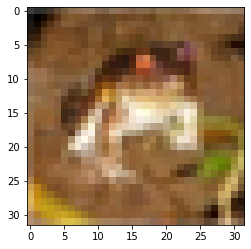

0번째 데이터 : 개구리
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
from tensorflow.keras import datasets                             # 데이터셋 다운로드 함수
import matplotlib.pyplot as plt                                   # 이미지 표시용 라이브러리 

(x, y), (x_test, y_test) = datasets.cifar10.load_data()           # keras에서 제공하는 데이터셋 불러오기

index2name = {
    0: '비행기',
    1: '작은차',
    2: '새',
    3: '고양이',
    4: '사슴',
    5: '댕댕이',
    6: '개구리',
    7: '말',
    8: '배',
    9: '큰차'
}

i = 0
plt.imshow(x[i])                                     # i번째 데이터를 이미지로 보이기
plt.show()
print(f'{i}번째 데이터 : {index2name[y[i][0]]}')

print(x.shape)
print(x_test.shape)

print(y.shape)
print(y_test.shape)

### 2. 전처리

In [ ]:
import numpy as np                        # 빠른 배열 연산용 라이브러리
from keras.utils import np_utils          # 라벨데이터 전처리 함수

x = x / 255                               # x 학습 데이터 전처리 : 0~1 범위로 스케일 노멀라이즈
x_test = x_test / 255                     # x 테스트 데이터 전처리

y = y.reshape(-1)
y = np_utils.to_categorical(y)            # y 학습 데이터 전처리 : 0~9 까지의 숫자를 각각의 값에 해당되는 벡터로 변환
y_test = y_test.reshape(-1)
y_test = np_utils.to_categorical(y_test)  # y 테스트 데이터 전처리

print(y.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


### 3. 모델

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, 3, padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, 3, padding='same'))        # 3*3 크기의 컨볼루션 연산
model.add(BatchNormalization())                 # 배치 정규화
model.add(Activation('relu'))
model.add(MaxPool2D())                          # 2*2 영역당 최댓값 추출

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(MaxPool2D())

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0

### 4. 학습

In [ ]:
history = model.fit(x, y, 1000, 10, validation_data=(x_test, y_test))

Epoch 1/10
50/50 [==============================] - 60s 851ms/step - loss: 1.7059 - accuracy: 0.3562 - val_loss: 6.7455 - val_accuracy: 0.1000
Epoch 2/10
50/50 [==============================] - 42s 837ms/step - loss: 1.1375 - accuracy: 0.5820 - val_loss: 4.5342 - val_accuracy: 0.1000
Epoch 3/10
50/50 [==============================] - 42s 840ms/step - loss: 0.8530 - accuracy: 0.6914 - val_loss: 3.0962 - val_accuracy: 0.1095
Epoch 4/10
50/50 [==============================] - 42s 839ms/step - loss: 0.6715 - accuracy: 0.7615 - val_loss: 5.1375 - val_accuracy: 0.1170
Epoch 5/10
50/50 [==============================] - 42s 838ms/step - loss: 0.5288 - accuracy: 0.8130 - val_loss: 3.2270 - val_accuracy: 0.1658
Epoch 6/10
50/50 [==============================] - 42s 838ms/step - loss: 0.4153 - accuracy: 0.8545 - val_loss: 5.4949 - val_accuracy: 0.1584
Epoch 7/10
50/50 [==============================] - 42s 838ms/step - loss: 0.3245 - accuracy: 0.8863 - val_loss: 3.6073 - val_accuracy: 0.2848

### 5. 예측

예측: 큰차


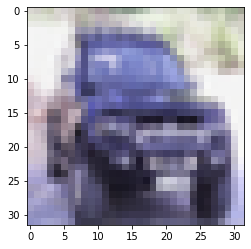

In [ ]:
i = 9
x_show = x_test
predict = model.predict(x_show[i:i+1])

class_index = np.argmax(predict[0])
class_name = index2name[class_index]

print('예측:', class_name)
plt.imshow(x_show[i])
plt.show()
